# Review : convolutional neural networks (CNNs)

### CNN layers = Feature Extractor for Images
- the early layers (those right after the input layer) extract **low-level features** from raw data, and
- the later layers (often **fully connected layers** like in a multilayer perceptron (MLP)) use these features to predict a continuous target value or class label.

> CNN computes feature maps

Certain types of multilayer NNs, and in particular, deep convolutional NNs, construct a so-called ***feature hierarchy*** by combining the low-level features in a layer-wise fashion to form high-level features. 

### CNNs will usually perform very well on image-related tasks, and that's largely due to two important ideas:
- **Sparse connectivity**: A single element in the feature map is connected to only a small patch of pixels. (This is very different from connecting to the whole input image as in the case of perceptrons. You may find it useful to look back and compare how we implemented a **fully connected network** that connected to the whole image in *Chapter 12*, *Implementing a Multilayer Artificial Neural Network from Scratch*.)
- **Parameter-sharing**: *The same weights* are used for different patches of the input image.

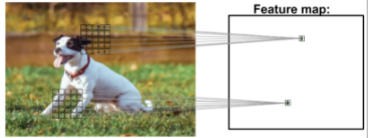

# Computational Vision at CALTECH

캘리포니아 공과대학(caltech)에서 ML을 위해 배포하고 있는 이미지 세트

## Catltech101
약 131M 정도

[Url of Caltech 101](http://www.vision.caltech.edu/Image_Datasets/Caltech101/Caltech101.html#Download): www.vision.caltech.edu/Image_Datasets/Caltech101/

### Mount your google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


다운로드 받은 caltech101 데이터를 업로드해놓은 구글 드라이브 경로를 얻고, 현재의 working directory로 카피

In [ ]:
!mkdir image

In [ ]:
!cp /content/drive/MyDrive/_[10]Lecture/MachineLearning/datasets/101_ObjectCategories.tar.gz ./image/

In [ ]:
!cd image
%cd image
!ls -al

/content/image
total 128668
drwxr-xr-x 2 root root      4096 Jul  8 13:00 .
drwxr-xr-x 1 root root      4096 Jul  8 13:00 ..
-rw------- 1 root root 131740031 Jul  8 13:00 101_ObjectCategories.tar.gz


압축 해제하여 사용할 데이터셋을 설정.

In [ ]:
!tar xvfz ./101_ObjectCategories.tar.gz > test.log

In [ ]:
import os
os.chdir('../')
os.getcwd()

'/content'

* 101가지 클래스를 전부를 분류하도록 학습하기에는 시간이 오래 걸림.
* 때문에 아래 코드 처럼, 5개의 클래스만 사용하기로 함.
  * chair (의자)
  * camera (카메라)
  * butterfly (나비)
  * elephant (코끼리)
  * flamingo (플라밍고)

In [ ]:
import numpy as np
import os, glob
import cv2 
from sklearn.model_selection import train_test_split

caltech_dir = './image/101_ObjectCategories'
categories = ['chair', 'camera', 'butterfly', 'elephant', 'flamingo']
num_classes = len(categories)

# Prepare inputs

We prepare dataset for training. 

* The input data are resized to uniform $64 \times 64$. 
* The labels are put into one-hot (a.k.a. categorical) encoding. 




In [ ]:
w = 64
h = 64
pixels = w*h*3

X = []
Y = []

for idx, cat in enumerate(categories):
  label = [0 for i in range(num_classes)]
  label[idx] = 1
  print(f'label of {cat}: {label}')

  image_dir = os.path.join(caltech_dir,cat)
  print(image_dir)
  files = glob.glob(os.path.join(image_dir,'*.jpg'))

  for i, f in enumerate(files):
    
    img = cv2.imread(f) #img = Image.open(f)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #img = img.convert('RGB')
    img = cv2.resize(img, (w,h))
    
    X.append(img)
    Y.append(label)    

# convert to ndarray!
X = np.array(X)
Y = np.array(Y)

label of chair: [1, 0, 0, 0, 0]
./image/101_ObjectCategories/chair
label of camera: [0, 1, 0, 0, 0]
./image/101_ObjectCategories/camera
label of butterfly: [0, 0, 1, 0, 0]
./image/101_ObjectCategories/butterfly
label of elephant: [0, 0, 0, 1, 0]
./image/101_ObjectCategories/elephant
label of flamingo: [0, 0, 0, 0, 1]
./image/101_ObjectCategories/flamingo


In [ ]:
X.shape

(334, 64, 64, 3)

In [ ]:
Y.shape

(334, 5)

# Divide train and test dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

xy = (X_train,X_test,y_train,y_test)
np.save('./image/5cat.npy',xy)
print('ok!', np.shape)
print('# of train samples:',len(X_train))
print('# of test samples:', len(X_test))

ok! <function shape at 0x7f6b0b24e7a0>
# of train samples: 250
# of test samples: 84


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


[0 1 0 0 0]


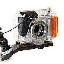

In [ ]:
from google.colab.patches import cv2_imshow

idx = 10
print(y_train[idx])
# cv2_imshow(X_train[idx],cv2.COLOR_BGR2RGB)
cv2_imshow(cv2.cvtColor(X_train[idx],cv2.COLOR_BGR2RGB))

# Convert TFData Souce from Numpy Arrays

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test))
train_dataset

<TensorSliceDataset shapes: ((64, 64, 3), (5,)), types: (tf.uint8, tf.int64)>

In [ ]:
batch_train_dataset = train_dataset.batch(batch_size=8,drop_remainder=True)
batch_test_dataset = test_dataset.batch(batch_size=8,drop_remainder=True)
batch_train_dataset

<BatchDataset shapes: ((8, 64, 64, 3), (8, 5)), types: (tf.uint8, tf.int64)>

# Visualizaing the data

The following code shows the first 9 images with their labels.

In [ ]:
def format_label(label):
  string_label = categories[tf.math.argmax(label)]
  return string_label


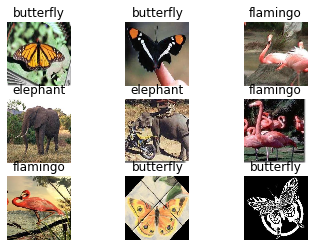

In [ ]:
import matplotlib.pyplot as plt

for i, (image, label) in enumerate(train_dataset.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"{format_label(label)}")
    plt.axis("off")

# DNN for Our Example



In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras import layers

In [ ]:
inputs = layers.Input(shape=(w,h,3))
x = layers.Conv2D(32,3,3,
                  #activation='relu',
                  padding='same')(inputs)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(64,3,3,
                  #activation='relu',
                  padding='same')(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(64,3,3,                  
                  #activation='relu',
                  padding='same')(x)                  
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Flatten()(x)
x = layers.Dense(512)(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(num_classes)(x)
outputs = layers.Activation('softmax')(x)

model = models.Model(inputs = inputs, outputs= outputs)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

epochs = 50 # @param {type:'slider', min:10, max:100}
hist = model.fit(batch_train_dataset,
                 epochs=epochs,
                 validation_data = batch_test_dataset,
                 verbose=2)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 22, 22, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 64)          0     

* 매우 빠른 시간에 끝나고, 90% 수준의 accuracy를 보임.
* 하지만 validation dataset에서의 accuracy는 그리 좋지 않음.
* 즉, overfit임...

In [ ]:
score = model.evaluate(batch_test_dataset)
print(f'loss={score[0]}')
print(f'accuracy={score[1]}')

10/10 [==============================] - 0s 2ms/step - loss: 1.9099 - accuracy: 0.5500
loss=1.9098615646362305
accuracy=0.550000011920929


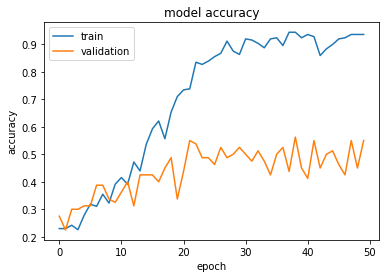

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(hist)

In [ ]:
pres = model.predict(X_test)
print(pres.shape)

error_img_dir = os.path.join('.','error')
try: 
  os.mkdir('error')
except FileExistsError as e:
  print(e)

cnt = 0
for idx,(pre_prob,ans_onehot) in enumerate(zip(pres, y_test)):  
  pre = pre_prob.argmax()
  ans = ans_onehot.argmax()
  if pre == ans:
    continue
  cnt += 1
  print(f'Error: predicted {format_label(pre_prob)} != label {format_label(ans_onehot)}')
  fstr = os.path.join(error_img_dir,f'{idx:02d}-{format_label(pre_prob)}-ne-{format_label(ans_onehot)}.png')
  cv2.imwrite(fstr, X_test[idx])

print(f'Error Rate = {cnt}/{len(X_test)}')
  

(84, 5)
Error: predicted camera != label elephant
Error: predicted camera != label elephant
Error: predicted elephant != label camera
Error: predicted butterfly != label chair
Error: predicted chair != label flamingo
Error: predicted butterfly != label camera
Error: predicted camera != label chair
Error: predicted camera != label elephant
Error: predicted flamingo != label butterfly
Error: predicted elephant != label chair
Error: predicted camera != label butterfly
Error: predicted flamingo != label chair
Error: predicted elephant != label butterfly
Error: predicted elephant != label chair
Error: predicted butterfly != label elephant
Error: predicted flamingo != label butterfly
Error: predicted camera != label elephant
Error: predicted butterfly != label chair
Error: predicted camera != label chair
Error: predicted elephant != label chair
Error: predicted butterfly != label chair
Error: predicted camera != label chair
Error: predicted chair != label elephant
Error: predicted butterfly 

# Export and Import Model Structure and Weights

A Keras model consists of multiple components:

* The **architecture**, or configuration, which specifies what layers the model contain, and how they're connected.
* A set of **weights values** (the "state of the model").
* An optimizer (defined by compiling the model).
* A set of losses and metrics (defined by compiling the model or calling `add_loss()` or `add_metric()`).

The Keras API makes it possible to save all of these pieces to disk at once, or to only selectively save some of them:

* Saving everything into a single archive in the ***TensorFlow `SavedModel` format*** (or in the older Keras H5 format). This is the standard practice.
* Saving the architecture / configuration only, typically as a JSON file.
* Saving the weights values only. This is generally used when training the model.

[Ref.] https://www.tensorflow.org/guide/keras/save_and_serialize

In [ ]:
from tensorflow.keras import models
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("my_model")

# It can be used to reconstruct the model identically.
reconstructed_model = models.load_model("my_model")

# Let's check:
np.testing.assert_allclose(
    model.predict(X_test), reconstructed_model.predict(X_test)
)

# ============================================================
# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
reconstructed_model.fit(batch_train_dataset) # batch를 잡고...
#reconstructed_model.fit(X_test, X_test)

INFO:tensorflow:Assets written to: my_model/assets
31/31 [==============================] - 1s 3ms/step - loss: 0.1111 - accuracy: 0.9476


### What the SavedModel contains

Calling `model.save('my_model')` creates a folder named `my_model`, containing the following:

In [ ]:
!ls my_model

assets	keras_metadata.pb  saved_model.pb  variables


The model ***architecture***, and training configuration (including the `optimizer`, `losses`, and `metrics`) are stored in `saved_model.pb`. 

The ***weights*** are saved in the `variables/` directory.

For detailed information on the ***SavedModel*** format, 
see the [SavedModel guide (The SavedModel format on disk)](https://www.tensorflow.org/guide/saved_model#the_savedmodel_format_on_disk).

### Keras H5 format

Keras also supports saving a ***single HDF5 file*** containing 
* the model's architecture, 
weights values, and 
compile() information. 

It is a light-weight alternative to `SavedModel`.

In [ ]:
# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
model.save("my_h5_model.h5")

# It can be used to reconstruct the model identically.
reconstructed_model = models.load_model("my_h5_model.h5")

# Let's check:
np.testing.assert_allclose(
    model.predict(X_test), reconstructed_model.predict(X_test)
)

#### Limitations

Compared to the `SavedModel` format, there are two things that don't get included in the ***H5 file***:

* **External losses & metrics added via `model.add_loss()` & `model.add_metric()` are not saved (unlike SavedModel).** <br/> If you have such losses & metrics on your model and you want to resume training, you need to add these losses back yourself **after loading the model**. <br/>
Note that this does not apply to losses/metrics created inside layers via `self.add_loss()` & `self.add_metric()`. <br/>As long as the layer gets loaded, these losses & metrics are kept, since they are part of the call method of the layer.
* The **computation graph of custom objects** such as custom layers is not included in the saved file. At loading time, Keras will need access to the Python classes/functions of these objects in order to reconstruct the model. See Custom objects.

### Saving the architecture

The model's ***configuration*** (or ***architecture***) specifies what layers the model contains, and how these layers are connected*. If you have the configuration of a model, then the model can be created with a freshly initialized state for the weights and no compilation information.

> Note this only applies to models defined using the ***functional*** or ***Sequential*** APIs not subclassed models.

In [ ]:
import tensorflow.keras as keras
# Sequential model example
model = keras.Sequential([keras.layers.InputLayer((32,)), keras.layers.Dense(1)])

config = model.get_config()
new_model = keras.Sequential.from_config(config)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 33        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 33        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Functional model example
inputs = keras.Input((32,))
outputs = keras.layers.Dense(1)(inputs)
model = keras.Model(inputs, outputs)

config = model.get_config()
new_model = keras.Model.from_config(config)

### Saving & loading only the model's weights values 

You can choose to only save & load a model's ***weights***. <br/>
This can be useful if:

* You only need the model for inference: 
  * in this case you won't need to ***restart training***, 
  * so you don't need *the compilation information* or *optimizer state*.
* You are doing ***transfer learning***: 
  * in this case you will be training a new model reusing the state of a prior model, 
  * so you don't need *the compilation information* of *the prior model*.

#### APIs for saving weights to disk & loading them back

Weights can be saved to disk by calling `model.save_weights` in the following formats:
* TensorFlow Checkpoint
* HDF5

The default format for `model.save_weights` is TensorFlow checkpoint. There are two ways to specify the save format:

*  `save_format` argument: Set the value to `save_format="tf"` or `save_format="h5"`.
* `path` argument: If the path ends with `.h5` or `.hdf5`, then the HDF5 format is used. Other suffixes will result in a TensorFlow checkpoint unless `save_format` is set.

There is also an option of retrieving weights as in-memory numpy arrays.

In [ ]:
model.save_weights("ckpt")
load_status = model.load_weights("ckpt")

# `assert_consumed` can be used as validation that all variable values have been
# restored from the checkpoint. See `tf.train.Checkpoint.restore` for other
# methods in the Status object.
load_status.assert_consumed()


# Keras Applications

Keras Applications are ***deep learning models*** that are made available alongside `pre-trained weights`. 

These models can be used for 
* prediction, 
* feature extraction, and 
* fine-tuning.

Weights are downloaded automatically when instantiating a model. They are stored at `~/.keras/models/.`

Upon instantiation, the models will be built according to the image data format set in your Keras configuration file at `~/.keras/keras.json`. For instance, if you have set `image_data_format=channels_last`, then any model loaded from this repository will get built according to the TensorFlow data format convention, `"Height-Width-Depth"`.

Ref. : https://keras.io/api/applications/

# Keras implementation of EfficientNet

An implementation of ***EfficientNet B0 to B7*** has been shipped with `tf.keras` since TF2.3. To use `EfficientNetB0` for classifying 1000 classes of images from imagenet, run:

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')

21839872/21834768 [==============================] - 0s 0us/step


* This model takes input images of `shape (224, 224, 3)`, and the input data should range `[0, 255]`. 
* Normalization is included as part of the model.

# Example: ResNet50 for Our Example

In [ ]:
from tensorflow.keras.applications.resnet50 import  ResNet50
inputs = layers.Input(shape=(w,h,3))
outputs = ResNet50(include_top=True, 
                         weights=None,
                         input_shape=(w,h,3),
                         classes=num_classes)(inputs)

model = models.Model(inputs = inputs, outputs= outputs)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

epochs = 40 # @param {type:'slider', min:10, max:100}

# hist = model.fit(X_train, y_train,
#                  epochs=epochs,
#                  #validation_data = (X_test, y_test),
#                  )
hist = model.fit(batch_train_dataset,
                 epochs=epochs,
                 validation_data = batch_test_dataset,
                 verbose=2)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
resnet50 (Functional)        (None, 5)                 23597957  
Total params: 23,597,957
Trainable params: 23,544,837
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/40
31/31 - 7s - loss: 4.4394 - accuracy: 0.2621 - val_loss: 803.3862 - val_accuracy: 0.2625
Epoch 2/40
31/31 - 1s - loss: 3.2880 - accuracy: 0.2460 - val_loss: 326.5037 - val_accuracy: 0.2625
Epoch 3/40
31/31 - 1s - loss: 2.5868 - accuracy: 0.3790 - val_loss: 2.7435 - val_accuracy: 0.2750
Epoch 4/40
31/31 - 1s - loss: 1.8065 - accuracy: 0.5968 - val_loss: 1.7472 - val_accuracy: 0.3500
Epoch 5/40
31/31 - 1s - loss: 1.4744 - accuracy: 0.5766 - val_loss: 2.3123 - val_accuracy: 0.2125
Epoch 6/40

* 1분 내에 학습 완료!
* 하지만 역시 overfitting

# Example: EfficientNetB0 for Our Example.

## From Scratch

We build an EfficientNetB0 with 4 output classes, that is initialized from scratch:

Note: the accuracy will increase very slowly and may overfit.

In [ ]:
from tensorflow.keras.applications.efficientnet import  EfficientNetB0
inputs = layers.Input(shape=(w,h,3))
outputs = EfficientNetB0(include_top=True, 
                         weights=None,
                         input_shape=(w,h,3),
                         classes=num_classes)(inputs)

model = models.Model(inputs = inputs, outputs= outputs)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

epochs = 40 # @param {type:'slider', min:10, max:100}

# hist = model.fit(X_train, y_train,
#                  epochs=epochs,
#                  #validation_data = (X_test, y_test),
#                  )
hist = model.fit(batch_train_dataset,
                 epochs=epochs,
                 validation_data = batch_test_dataset,
                 verbose=2)


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 5)                 4055976   
Total params: 4,055,976
Trainable params: 4,013,953
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/40
31/31 - 9s - loss: 6.3412 - accuracy: 0.2339 - val_loss: 1.6860 - val_accuracy: 0.2625
Epoch 2/40
31/31 - 1s - loss: 5.2931 - accuracy: 0.3548 - val_loss: 1.9519 - val_accuracy: 0.1750
Epoch 3/40
31/31 - 1s - loss: 2.8863 - accuracy: 0.5121 - val_loss: 1.6787 - val_accuracy: 0.1250
Epoch 4/40
31/31 - 1s - loss: 1.6759 - accuracy: 0.5887 - val_loss: 2.2102 - val_accuracy: 0.1750
Epoch 5/40
31/31 - 1s - loss: 1.6588 - accuracy: 0.5968 - val_loss: 1.8474 - val_accuracy: 0.1250
Epoch 6/40
31/31

Training the model is relatively fast (takes only 54 seconds per epoch on GPU that is available on Colab). This might make it sounds easy to simply train EfficientNet on any dataset wanted from scratch. 
However, training EfficientNet on smaller datasets, especially those with lower resolution like our examples or CIFAR-100, faces the significant challenge of ***overfitting***.

Hence training from scratch 
* requires very careful choice of ***hyperparameters*** and 
is difficult to find ***suitable regularization***. 

It would also be much more demanding in resources. 
> 우리의 경우처럼 데이터가 적은 경우 overfitting되기 쉬움.

Plotting the training and validation accuracy makes it clear that validation accuracy stagnates at a low value.

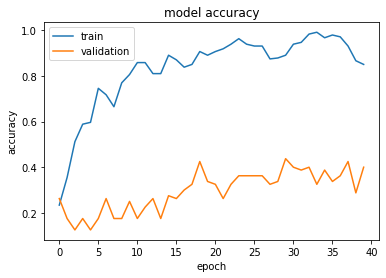

In [ ]:
plot_hist(hist)

# Data augmentation


데이터의 양을 늘리기 위해 원본에 각종 변환을 적용하여 개수를 증강시키는 기법

Ref. : https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0197-0

We can use `preprocessing` layers APIs for **image augmentation**.

https://keras.io/guides/preprocessing_layers/

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
  [
    # representing lower and upper bound for rotating clockwise and counter-clockwise. 
    preprocessing.RandomRotation(factor=0.15), # a float represented as fraction of 2pi, ex :0.15 (= 54 degree!) 
    
    preprocessing.RandomTranslation(height_factor=0.1, # lower and upper bound for shifting vertically
                                    width_factor=0.1 #lower and upper bound for shifting horizontally.
                                    ),
    preprocessing.RandomFlip(), # Randomly flip each image horizontally and vertically.
    preprocessing.RandomContrast(factor=0.1),
  ],
  name="img_augmentation",
)

This `Sequential` model object can be used both 
* as a part of the model we later build, and 
* as a function to preprocess data before feeding into the model. 

Using them as function makes it easy to visualize the augmented images. Here we plot 9 examples of augmentation result of a given figure.

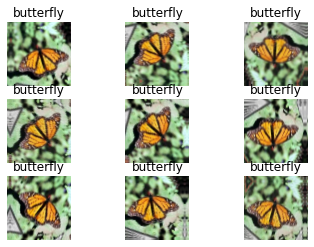

In [ ]:
for image, label in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    aug_img = img_augmentation(tf.expand_dims(image, axis=0))
    plt.imshow(aug_img[0].numpy().astype("uint8"))
    
    plt.title(f"{format_label(label)}")
    plt.axis("off")

Data Augumentation은 데이터가 적을 때, generalization performance를 올릴 수 있는 가장 손쉬운 방법임.

In [ ]:
from tensorflow.keras.applications.efficientnet import  EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras import layers

inputs = layers.Input(shape=(w,h,3))
x = img_augmentation(inputs)
outputs = EfficientNetB0(include_top=True, 
                         weights=None,
                         input_shape=(w,h,3),
                         classes=num_classes)(x)

model = models.Model(inputs = inputs, outputs= outputs)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

epochs = 200 # @param {type:'slider', min:10, max:200}
batch_size = 8

hist = model.fit(batch_train_dataset,
                 epochs=epochs,
                 validation_data = batch_test_dataset,
                 verbose=2)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
img_augmentation (Sequential (None, 64, 64, 3)         0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 5)                 4055976   
Total params: 4,055,976
Trainable params: 4,013,953
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/200
31/31 - 9s - loss: 6.1105 - accuracy: 0.2661 - val_loss: 1.8383 - val_accuracy: 0.1750
Epoch 2/200
31/31 - 1s - loss: 5.1619 - accuracy: 0.2379 - val_loss: 1.6171 - val_accuracy: 0.1750
Epoch 3/200
31/31 - 1s - loss: 3.8530 - accuracy: 0.2339 - val_loss: 2.3551 - val_accuracy: 0.1750
Epoch 4/200
31/31 - 1s - loss: 2.9411 - accuracy: 0.2419 - val_loss: 2.3058 -

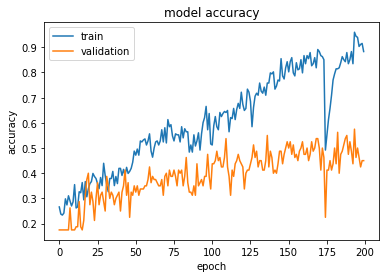

In [ ]:
plot_hist(hist)

# Transfer learning from pre-trained weights

Here we initialize the model with pre-trained ImageNet weights, and we fine-tune it on our own dataset.

16711680/16705208 [==============================] - 0s 0us/step
Epoch 1/25
31/31 - 6s - loss: 1.8960 - accuracy: 0.5363 - val_loss: 0.6177 - val_accuracy: 0.7625
Epoch 2/25
31/31 - 0s - loss: 0.9496 - accuracy: 0.7500 - val_loss: 0.4951 - val_accuracy: 0.8500
Epoch 3/25
31/31 - 0s - loss: 1.0124 - accuracy: 0.7863 - val_loss: 0.5195 - val_accuracy: 0.8375
Epoch 4/25
31/31 - 0s - loss: 0.7909 - accuracy: 0.8427 - val_loss: 0.4728 - val_accuracy: 0.8625
Epoch 5/25
31/31 - 0s - loss: 0.8531 - accuracy: 0.7944 - val_loss: 0.4763 - val_accuracy: 0.8625
Epoch 6/25
31/31 - 0s - loss: 0.5840 - accuracy: 0.8589 - val_loss: 0.7041 - val_accuracy: 0.8125
Epoch 7/25
31/31 - 0s - loss: 0.8312 - accuracy: 0.8185 - val_loss: 0.5544 - val_accuracy: 0.8625
Epoch 8/25
31/31 - 0s - loss: 0.6683 - accuracy: 0.8387 - val_loss: 0.8006 - val_accuracy: 0.8375
Epoch 9/25
31/31 - 0s - loss: 1.0213 - accuracy: 0.8347 - val_loss: 0.6989 - val_accuracy: 0.8875
Epoch 10/25
31/31 - 0s - loss: 0.7951 - accuracy: 0.8

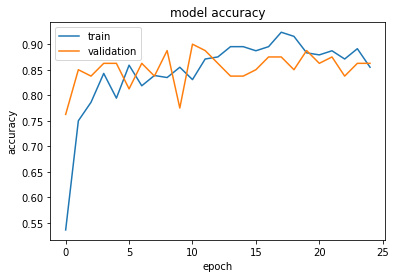

In [ ]:
inputs = layers.Input(shape=(w,h,3))
x = img_augmentation(inputs)
model = EfficientNetB0(include_top=False, 
                       input_tensor=x, 
                       weights="imagenet")

# Freeze the pretrained weights
model.trainable = False

# Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = layers.Dense(num_classes, 
                       activation="softmax", 
                       name="pred")(x)

# Compile
model = tf.keras.Model(inputs, outputs, name="EfficientNet")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(optimizer=optimizer, 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

epochs = 25  # @param {type: "slider", min:8, max:80}
hist = model.fit(batch_train_dataset,
                 epochs=epochs,
                 validation_data = batch_test_dataset,
                 verbose=2)
plot_hist(hist)

The first step to ***transfer learning*** is to 
* freeze all layers and 
* train only the top layers. 

For this step, ***a relatively large learning rate (1e-2)*** can be used. 

Note that validation accuracy and loss will usually be better than training accuracy and loss. This is because the regularization is strong, which only suppresses training-time metrics.

Note that the convergence may take up to 10 epochs depending on choice of learning rate. 

If image augmentation layers were not applied, the validation accuracy may only reach ~60%.

In [ ]:
model.summary()

The second step is to
*  unfreeze a number of layers and 
* fit the model using smaller learning rate. 

In this example we show **unfreezing all layers**, but depending on specific dataset *it may be desireble to only unfreeze a fraction of all layers*.

When the feature extraction with pretrained model works good enough, this step would give a very limited gain on validation accuracy. 
* In our case we only see a small improvement, as ImageNet pretraining already exposed the model to a good amount of our classes.

On the other hand, ***when we use pretrained weights on a dataset that is more different from ImageNet***, this fine-tuning step can be ***crucial*** as the feature extractor also needs to be adjusted by a considerable amount. 
* Such a situation can be demonstrated if choosing CIFAR-100 dataset instead,
* where fine-tuning boosts validation accuracy by about 10% to pass 80% on EfficientNetB0. 
* In such a case the convergence may take more than 50 epochs.

A side note on freezing/unfreezing models: 
* setting trainable of a Model will simultaneously set all layers belonging to the `Model` to the same trainable attribute. 
* Each layer is trainable only if both the layer itself and the model containing it are trainable. 
* Hence when we need to partially freeze/unfreeze a model, we need to make sure the trainable attribute of the model is set to `True`.

Epoch 1/15
31/31 - 6s - loss: 0.4350 - accuracy: 0.9234 - val_loss: 0.7737 - val_accuracy: 0.9000
Epoch 2/15
31/31 - 0s - loss: 0.4150 - accuracy: 0.9476 - val_loss: 0.9798 - val_accuracy: 0.8625
Epoch 3/15
31/31 - 0s - loss: 0.2262 - accuracy: 0.9435 - val_loss: 1.1269 - val_accuracy: 0.8500
Epoch 4/15
31/31 - 0s - loss: 0.4782 - accuracy: 0.9476 - val_loss: 1.1301 - val_accuracy: 0.8625
Epoch 5/15
31/31 - 0s - loss: 0.2132 - accuracy: 0.9718 - val_loss: 1.0100 - val_accuracy: 0.8500
Epoch 6/15
31/31 - 0s - loss: 0.5298 - accuracy: 0.9194 - val_loss: 0.8867 - val_accuracy: 0.8750
Epoch 7/15
31/31 - 0s - loss: 0.3066 - accuracy: 0.9556 - val_loss: 0.9780 - val_accuracy: 0.8875
Epoch 8/15
31/31 - 0s - loss: 0.3673 - accuracy: 0.9435 - val_loss: 0.8698 - val_accuracy: 0.8750
Epoch 9/15
31/31 - 0s - loss: 0.2975 - accuracy: 0.9637 - val_loss: 0.9669 - val_accuracy: 0.8750
Epoch 10/15
31/31 - 0s - loss: 0.3659 - accuracy: 0.9355 - val_loss: 0.9070 - val_accuracy: 0.8625
Epoch 11/15
31/31 -

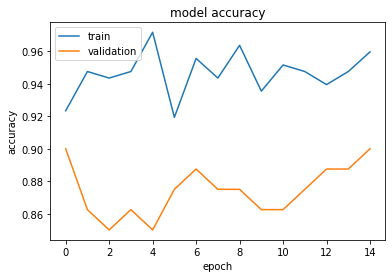

In [ ]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )


unfreeze_model(model)

epochs = 15  # @param {type: "slider", min:8, max:50}
hist = model.fit(batch_train_dataset,
                 epochs=epochs,
                 validation_data = batch_test_dataset,
                 verbose=2)
plot_hist(hist)

# Tips for fine tuning EfficientNet

#### On unfreezing layers:

* The [`BathcNormalization`](https://www.notion.so/mmmil/Batch-Normalization-e324bb0f38c34e60922b516d124555ed) layers need to be kept **frozen** ([more details](https://keras.io/guides/transfer_learning/)). <br />If they are also turned to trainable, the first epoch after unfreezing will significantly reduce accuracy.
* In some cases it may be beneficial ***to open up only a portion of layers*** instead of unfreezing all. <br /> This will make fine tuning much faster when going to larger models like B7.
* ***Each block needs to be all turned on or off***. <br />This is because the architecture includes a shortcut from the first layer to the last layer for each block. Not respecting blocks also significantly harms the final performance.

#### Some other tips for utilizing `EfficientNet`:

* Larger variants of EfficientNet do not guarantee improved performance, especially for tasks with less data or fewer classes. <br /> In such a case, the larger variant of EfficientNet chosen, the harder it is to tune hyperparameters.<br/> 많은 파라메터는 복잡한 모델을 의미하고, 이는 overfit을 피하기 위해 보다 많은 학습데이터가 필요함을 의미함.
* EMA (Exponential Moving Average) is very helpful in training EfficientNet from scratch, but not so much for transfer learning. <br/>  learning curve를 스무스하게 보는 것이 from scratch에서 도움이 확실히 됨.
* Do not use the `RMSprop` setup as in the original paper for transfer learning. <br />The momentum and learning rate are too high for transfer learning. It will easily corrupt the pretrained weight and blow up the loss. A quick check is to see if `loss` (as `categorical_cross_entropy`) is getting significantly larger than `log(NUM_CLASSES)` after the same epoch. If so, the initial learning rate/momentum is too high.
* ***Smaller batch size benefit validation accuracy***, possibly due to effectively providing regularization.

# Grad-CAM class activation visualization

https://keras.io/examples/vision/grad_cam/

It is a **visualization technique** for CNN. 

***Class Activation Map (CAM)*** is useful for understanding **which parts of a given image led a CNN(or convnet) to its final classification decision**.

It consists of producing heatmaps of class activation over input images.

A ***class activation heatmap*** is a **2D grid of scores** associated with a specific output class.